<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

# 1. Big picture



In [56]:
Train = pd.read_csv("https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/loan_prediction_train.csv")

In [57]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
Train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 2. Univariate analysis


In [41]:

Train.Gender.value_counts(normalize=True)


Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

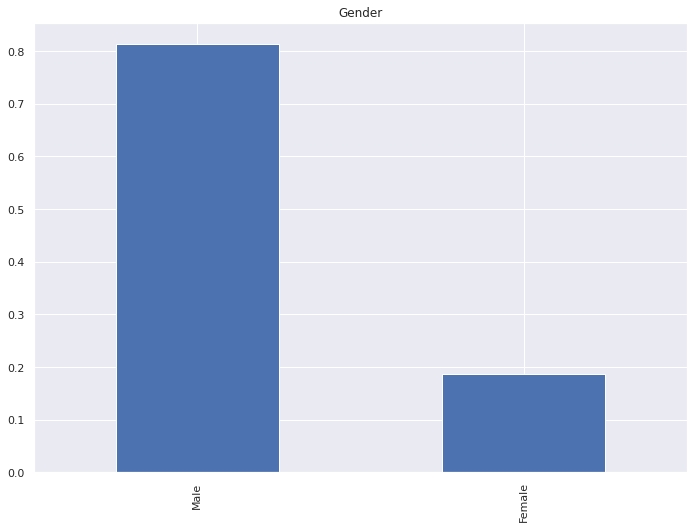

In [42]:
Train.Gender.value_counts(normalize=True).plot(kind = 'bar', title = "Gender")


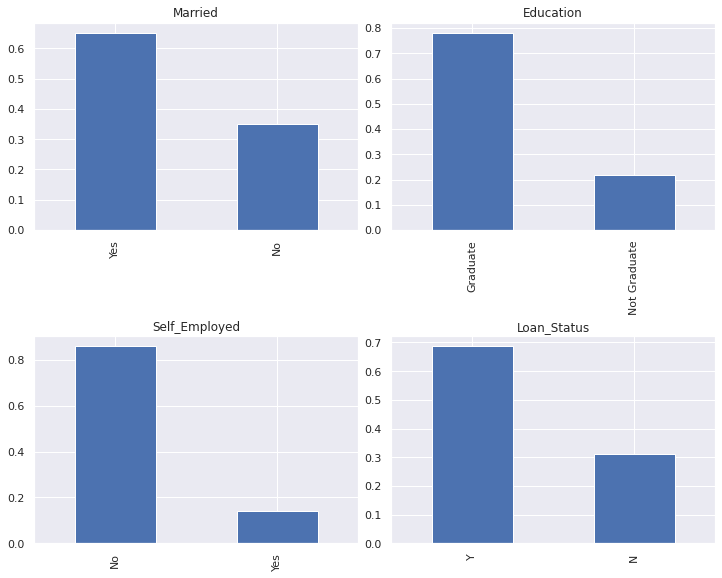

In [43]:
plt.subplot(221)
Train.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married",figsize=(10,8))
plt.tight_layout(pad=0.5)
plt.subplot(222)
Train.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)
plt.subplot(223)
Train.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)
plt.subplot(224)
Train.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)

# Findings

80% of loan applicants are male in the training dataset.
Nearly 70% are married
About 75% of loan applicants are graduates
Nearly 85–90% loan applicants are self-employed
The loan has been approved for more than 65% of applicants.

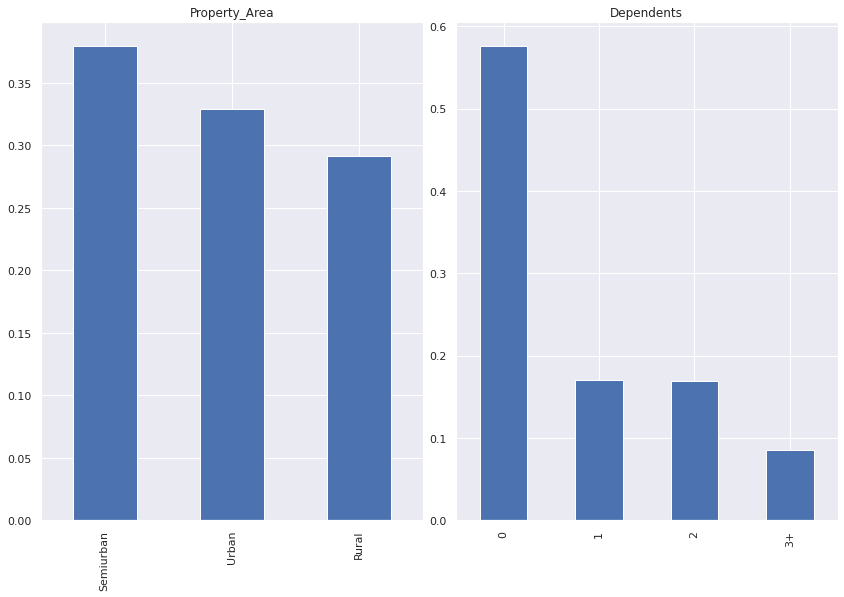

In [44]:
plt.subplot(121)
Train.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)
plt.subplot(122)
Train.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)

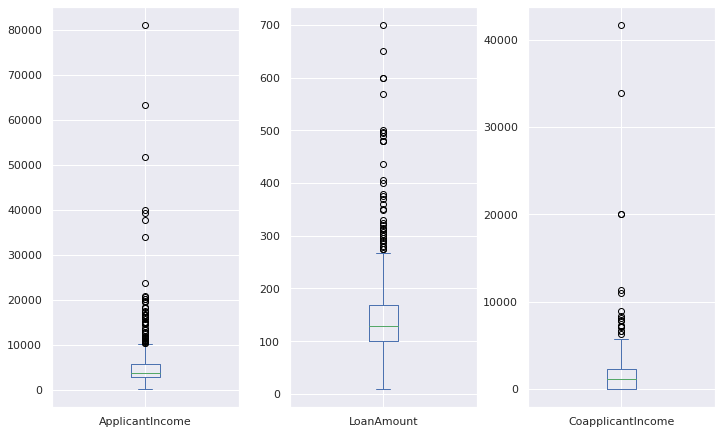

In [45]:
# Almost 58% of the applicants have no dependents.
# Highest number of applicants are from Semi Urban areas, followed by urban areas.


plt.subplot(131)
Train['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
Train['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
Train['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

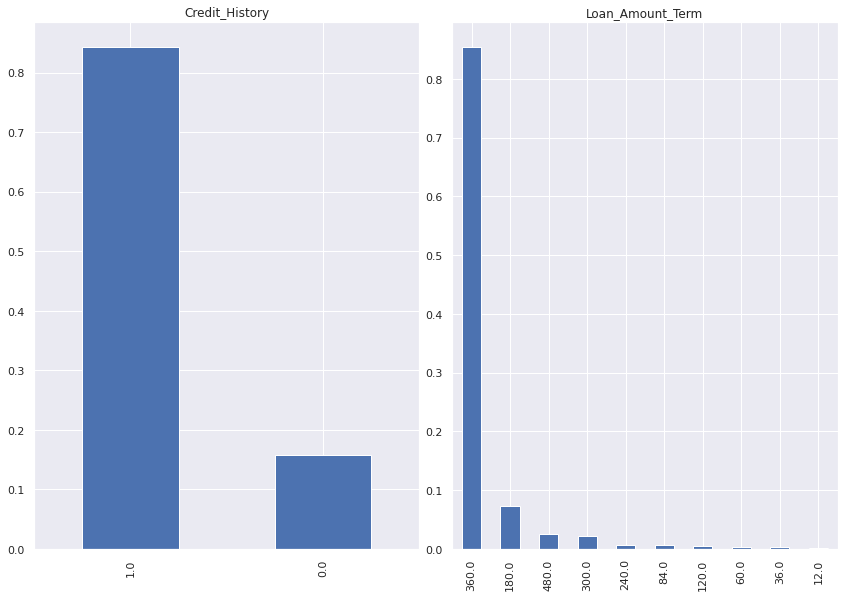

In [46]:
plt.subplot(121)
Train.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)
plt.subplot(122)
Train.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

# Multivariate analysis


Hipotesis:


*    Applicants with higher income might have more chances of getting their loans approved.
*Applicants with less number of dependents higher coapplicantIncome might have more chances of getting loan approvals.
*Applicants who are graduates, tend to earn more and hence have higher loan approval rates.
*Applicants who are married, might seem more responsible hence higher loan approval chances.
*Applicants who are not self-employed, might have a higher chances of loan approval as they tend to have constant source of income. There is less uncertainty, I would say.
*Candidates with property in urban areas might have higher chances of loan approval, since the cost of collateral would be high.
*Good credit history should definitely correlate with loan approval.
* For Gender, I don’t have any specific thing in my mind but let’s say women tend to be more responsible and hence high approval rates. (P.S. No Hate).

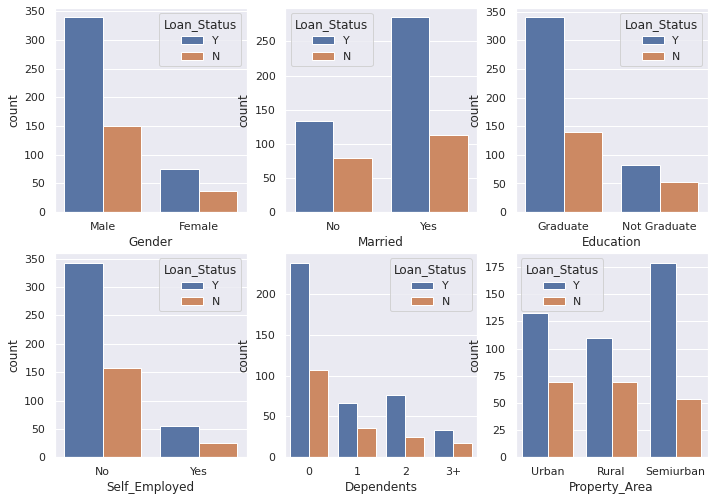

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=Train)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=Train)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=Train)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=Train)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=Train)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=Train)

# Findings

There is not a substantial difference between male and female approval rates.
Married applicants have a slightly higher chances of loan approval.
Graduates have higher chance of loan approval compared to non-graduates.
There is no substantial difference in the loan approval rates for self_employed vs not self_employed.
Applicants with no dependents or 2 dependents have higher chances of approval. But this does not correlate well.
Applicants with properties in semi-urban areas have higher loan approval rates.

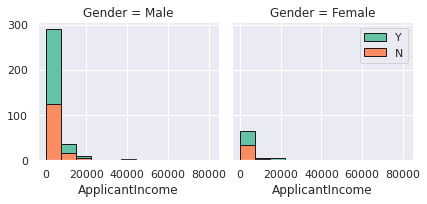

In [49]:
bins = np.linspace(Train.ApplicantIncome.min(), Train.ApplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

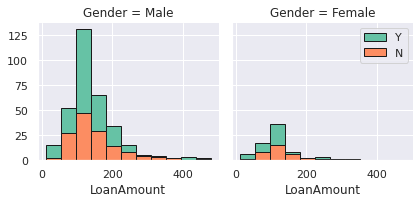

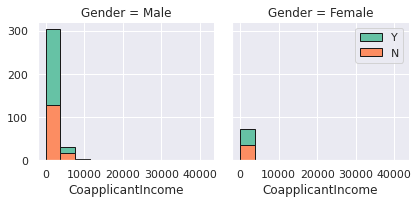

In [50]:
bins = np.linspace(Train.Loan_Amount_Term.min(), Train.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(Train.CoapplicantIncome.min(), Train.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

# Findings

Females with income higher than 7000 has higher chances of loan approval
Females seem to loan lesser amount than men
The coapplicant income for female candidates is less compared to males. However, it does not reflect much on the loan_status.

#Taller
1. Desarrollar mas plots with other predictors such as married, self_employed, property_area etc.

2. Hacer lo mismo con test


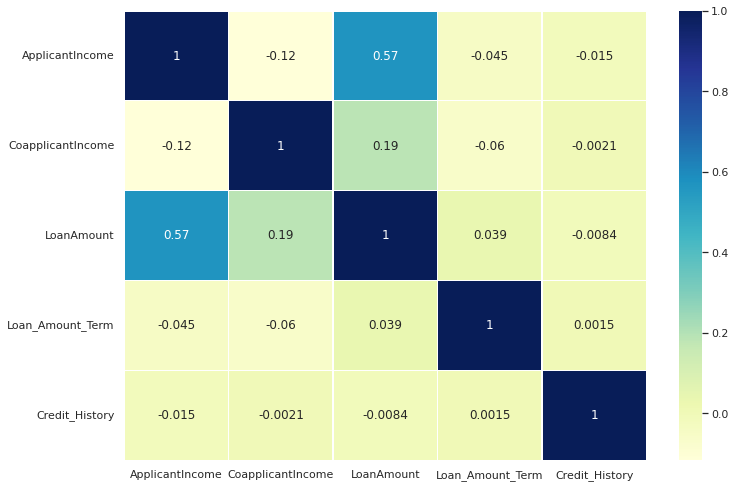

In [51]:
correlation_mat = Train.corr()

sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")


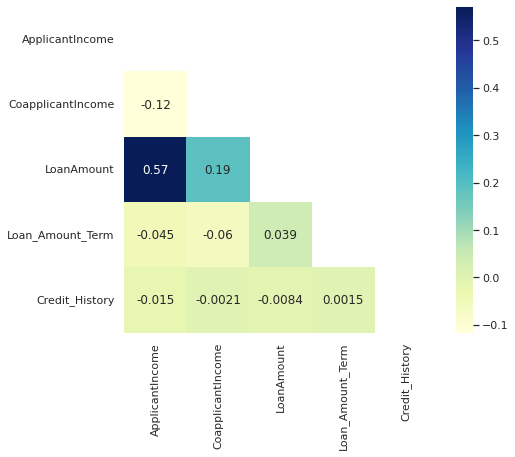

In [52]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

# Findings

There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

In [55]:

# Based on: https://towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8